# Python libraries continued

**Example: Adding text to image files**

- It’s possible to create a Python function that adds a text string to an image file — using the **Pillow** library (the modern fork of PIL, the Python Imaging Library).

In [ ]:
# Run this once, else there will be an error message
! pip install Pillow

In [46]:
from PIL import Image, ImageDraw, ImageFont

def add_text_to_image(input_path, output_path, text, position=(10, 10), font_size=24):
    """
    Adds text to an image and saves it as a new file.
    
    Args:
        input_path: Path to the input image.
        output_path: Path to save the modified image.
        text: Text string to add.
        position: Tuple (x, y) for text position.
        font_size: Size of the text font.

    RGBA stands for:
        R – Red
        G – Green
        B – Blue
        A – Alpha (transparency)

    When the alpha value is set to 0, the color becomes invisible, and the underlying content or background will be fully visible.
    """
    # Open the image
    image = Image.open(input_path).convert("RGBA")
    
    # Create a transparent layer to draw text on
    txt_layer = Image.new("RGBA", image.size, (255,255,255,0))
    draw = ImageDraw.Draw(txt_layer)

    # Load default font or specify one
    try:
        font = ImageFont.truetype("arial.ttf", font_size)  # or another .ttf path
    except:
        font = ImageFont.load_default()

    # Draw the text
    draw.text(position, text, fill=(255, 0, 0, 255), font=font)  # red text

    # Combine image with text layer
    combined = Image.alpha_composite(image, txt_layer)

    # Save to output file
    combined.convert("RGB").save(output_path, "JPEG")


In [48]:
# Run previous cell first
add_text_to_image("white_table.jpg", "written_table.jpg", "Hello", position=(700, 400), font_size=64)


In [50]:
# Run previous cell first
# Adding a second text
add_text_to_image("written_table.jpg", "written_table_2.jpg", "What's up?", position=(700, 1000), font_size=64)

**Example: Simple Python script to display a .jpg image in a Jupyter Notebook using Pillow and IPython.display**

**Notes:**

- This works only in Jupyter Notebooks (like JupyterLab, VS Code Notebooks, or Google Colab).
- The display() function is from IPython.display, and it's specifically designed to render rich outputs (like images, HTML, etc.).

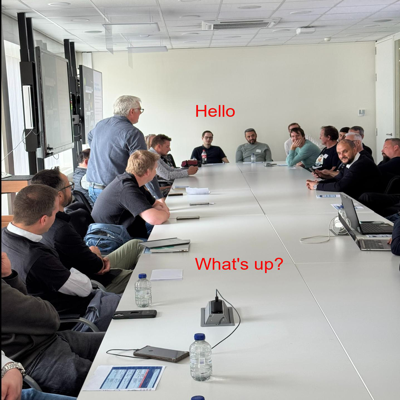

In [53]:
from PIL import Image
from IPython.display import display

# Load the image (replace 'your_image.jpg' with your filename)
image = Image.open("written_table_2.jpg")

# Display the image in the notebook
# display(image)

resized_image = image.resize((400, 400))  # width, height
display(resized_image)


## Maps
**Example: Show a Location on OpenStreetMap with folium**

In [ ]:
# Run this once
# First, install the library (if needed)
! pip install folium
# To search by a place name
! pip install geopy

**Example using fixed latitude and longitude**

In [57]:
import folium

# Define the coordinates (e.g., Brussels)
latitude = 50.8503
longitude = 4.3517

# Create a map centered around the location
mymap = folium.Map(location=[latitude, longitude], zoom_start=13)

# Add a marker to the map
folium.Marker([latitude, longitude], popup="Brussels, Belgium").add_to(mymap)

# Display the map (works in Jupyter Notebooks)
mymap

**Example Using Location Name, instead of Coordinates**

**using IPython**
- IPython stands for **Interactive Python**
- IPython is the **kernel** that runs Python code inside Jupyter Notebooks
- It is an enhanced interactive shell built for Python programming — offering a richer, more productive experience than the standard Python interpreter
- Displays **images, LaTeX, HTML, tables, and charts** when used in Jupyter
- You can run **shell commands** like **!ping ; !pip install folium** inside IPython

In [60]:
import folium
from geopy.geocoders import Nominatim
from IPython.display import display  # 👈 needed for notebooks

def show_location_on_map(place_name):
    # Geocoding with OpenStreetMap
    geolocator = Nominatim(user_agent="my_map_app")
    location = geolocator.geocode(place_name)

    if location:
        print(f"Found: {location.address}")
        print(f"Coordinates: {location.latitude}, {location.longitude}")

        # Create and display the map
        mymap = folium.Map(location=[location.latitude, location.longitude], zoom_start=15)
        folium.Marker([location.latitude, location.longitude], popup=location.address).add_to(mymap)

        display(mymap)  # 👈 this ensures it renders in the notebook
    else:
        print("Location not found.")


In [62]:
# Run previous cell first
# Replace this with any location name
map_output = show_location_on_map("Eiffel Tower, Paris")
if map_output:
    map_output

Found: Tour Eiffel, 5, Avenue Anatole France, Quartier du Gros-Caillou, Paris 7e Arrondissement, Paris, France métropolitaine, 75007, France
Coordinates: 48.8582599, 2.2945006


**Example: Requesting input of location name**

In [67]:
# Run previous cell first
# Request realtime location input
location_requested = input("What location would you like to see? (e.g. Eiffel Tower, Paris)")
map_output = show_location_on_map(location_requested)
if map_output:
    map_output

What location would you like to see? (e.g. Eiffel Tower, Paris) Paramaribo, Suriname


Found: Centrum, Paramaribo, Suriname
Coordinates: 5.8241764, -55.1662813


# Dictionaries & json Revisited and Further Explored

**Is the structure (in the next cell) dict or json?**

In Python, the distinction between a dict and JSON hinges on their data types and intended uses:

- **JSON**: A JSON object is a string that represents data in a structured, text-based format. It's commonly used for transmitting or storing data across different systems.
- **dict**: A dict is a native Python data structure that stores data as **key-value** pairs, allowing for direct access and manipulation within Python programs.

**To convert between these two, Python provides the json module:**

- **From dict to JSON**: Use json.dumps() to serialize a Python dictionary into a JSON-formatted string.
- **From JSON to dict**: Use json.loads() to deserialize a JSON-formatted string back into a Python dictionary.

This distinction is crucial: **JSON strings are ideal for data exchange and storage**, while **dictionaries are optimal for in-memory data manipulation** within Python.


In [4]:
groups_str = """ {
 "groups": [
      { "group": { "group_id": "G1" , "group_name": "Micro" ,    
                   "members": [   
                     {"person_id": "P-1" , "person_name": "Nick", "email": "nick@biasc.be"},
                     {"person_id": "P-2" , "person_name": "Marcus", "email": "marcus@biasc.be"},
                     {"person_id": "P-3" , "person_name": "Liesbet", "email": "liesbet@biasc.be"} 
                   ]
                 }
      },
      { "group": { "group_id": "G2" , "group_name": "Nano" ,    
                   "members": [   
                     {"person_id": "P-4" ,"person_name": "Martin", "email": "martin@biasc.be"}, 
                     {"person_id": "P-5" ,"person_name": "Bob", "email": "bob@biasc.be"}, 
                     {"person_id": "P-6" ,"person_name": "Alice", "email": "alice@biasc.be"} 
                   ]     
                 }
      },
      { "group": { "group_id": "G3" , "group_name": "Pico" ,    
                   "members": [   
                     {"person_id": "P-7" ,"person_name": "Matt", "email": "matt@biasc.be"}, 
                     {"person_id": "P-8" ,"person_name": "Lucas", "email": "lucas@biasc.be"}, 
                     {"person_id": "P-9" ,"person_name": "Elsa", "email": "elsa@biasc.be"} 
                   ] 
                 }
      }
   ]
}
"""

In [5]:
# Here is the answer
# Run previous cell first
print(type(groups_str))
print(groups_str)

<class 'str'>
 {
 "groups": [
      { "group": { "group_id": "G1" , "group_name": "Micro" ,    
                   "members": [   
                     {"person_id": "P-1" , "person_name": "Nick", "email": "nick@biasc.be"},
                     {"person_id": "P-2" , "person_name": "Marcus", "email": "marcus@biasc.be"},
                     {"person_id": "P-3" , "person_name": "Liesbet", "email": "liesbet@biasc.be"} 
                   ]
                 }
      },
      { "group": { "group_id": "G2" , "group_name": "Nano" ,    
                   "members": [   
                     {"person_id": "P-4" ,"person_name": "Martin", "email": "martin@biasc.be"}, 
                     {"person_id": "P-5" ,"person_name": "Bob", "email": "bob@biasc.be"}, 
                     {"person_id": "P-6" ,"person_name": "Alice", "email": "alice@biasc.be"} 
                   ]     
                 }
      },
      { "group": { "group_id": "G3" , "group_name": "Pico" ,    
                   "members": 

In [6]:
groups_struc = {
 "groups": [
      { "group": { "group_id": "G1" , "group_name": "Micro_Group" ,    
                   "members": [   
                     {"person_id": "P-1" , "person_name": "Nick", "email": "nick@biasc.be"},
                     {"person_id": "P-2" , "person_name": "Marcus", "email": "marcus@biasc.be"},
                     {"person_id": "P-3" , "person_name": "Liesbet", "email": "liesbet@biasc.be"} 
                   ]
                 }
      },
      { "group": { "group_id": "G2" , "group_name": "Nano_Group" ,    
                   "members": [   
                     {"person_id": "P-4" ,"person_name": "Martin", "email": "martin@biasc.be"}, 
                     {"person_id": "P-5" ,"person_name": "Bob", "email": "bob@biasc.be"}, 
                     {"person_id": "P-6" ,"person_name": "Alice", "email": "alice@biasc.be"} 
                   ]     
                 }
      },
      { "group": { "group_id": "G3" , "group_name": "Pico_Group" ,    
                   "members": [   
                     {"person_id": "P-7" ,"person_name": "Matt", "email": "matt@biasc.be"}, 
                     {"person_id": "P-8" ,"person_name": "Lucas", "email": "lucas@biasc.be"}, 
                     {"person_id": "P-9" ,"person_name": "Elsa", "email": "elsa@biasc.be"} 
                   ] 
                 }
      }
   ]
}

In [7]:
# Here is the answer
# Run previous cell first
print(type(groups_struc))
print(groups_struc)

<class 'dict'>
{'groups': [{'group': {'group_id': 'G1', 'group_name': 'Micro_Group', 'members': [{'person_id': 'P-1', 'person_name': 'Nick', 'email': 'nick@biasc.be'}, {'person_id': 'P-2', 'person_name': 'Marcus', 'email': 'marcus@biasc.be'}, {'person_id': 'P-3', 'person_name': 'Liesbet', 'email': 'liesbet@biasc.be'}]}}, {'group': {'group_id': 'G2', 'group_name': 'Nano_Group', 'members': [{'person_id': 'P-4', 'person_name': 'Martin', 'email': 'martin@biasc.be'}, {'person_id': 'P-5', 'person_name': 'Bob', 'email': 'bob@biasc.be'}, {'person_id': 'P-6', 'person_name': 'Alice', 'email': 'alice@biasc.be'}]}}, {'group': {'group_id': 'G3', 'group_name': 'Pico_Group', 'members': [{'person_id': 'P-7', 'person_name': 'Matt', 'email': 'matt@biasc.be'}, {'person_id': 'P-8', 'person_name': 'Lucas', 'email': 'lucas@biasc.be'}, {'person_id': 'P-9', 'person_name': 'Elsa', 'email': 'elsa@biasc.be'}]}}]}


**Filtering from a dict**

In [9]:
# Run previous cell first
print(groups_struc.keys())

dict_keys(['groups'])


In [10]:
# Run previous cell first
print(groups_struc["groups"][0].keys())

dict_keys(['group'])


In [11]:
# Run previous cell first
print(groups_struc["groups"][0]["group"].keys())


dict_keys(['group_id', 'group_name', 'members'])


In [12]:
# Run previous cell first
print(groups_struc["groups"][0]["group"]["members"][0].keys())

dict_keys(['person_id', 'person_name', 'email'])


In [13]:
# Run previous cell first
searched_item = groups_struc["groups"][0]["group"]["members"][0]
print(searched_item)

{'person_id': 'P-1', 'person_name': 'Nick', 'email': 'nick@biasc.be'}


In [14]:
# Run previous cell first
searched_item = groups_struc["groups"][0]["group"]["members"][0]["person_name"]
print(searched_item)

Nick


**Task:** Write a statement that extracts all the group names



**Functions to work with dict**

In [17]:
# Adding functions
groups_struc = {
    "groups": [
        { "group": { "group_id": "G1", "group_name": "Micro Group",
                     "members": [
                         {"person_id": "P-1", "person_name": "Nick", "email": "nick@biasc.be"},
                         {"person_id": "P-2", "person_name": "Marcus", "email": "marcus@biasc.be"},
                         {"person_id": "P-3", "person_name": "Liesbet", "email": "liesbet@biasc.be"}
                     ]
        }},
        { "group": { "group_id": "G2", "group_name": "Nano Group",
                     "members": [
                         {"person_id": "P-4", "person_name": "Martin", "email": "martin@biasc.be"},
                         {"person_id": "P-5", "person_name": "Bob", "email": "bob@biasc.be"},
                         {"person_id": "P-6", "person_name": "Alice", "email": "alice@biasc.be"}
                     ]
        }},
        { "group": { "group_id": "G3", "group_name": "Pico Group",
                     "members": [
                         {"person_id": "P-7", "person_name": "Matt", "email": "matt@biasc.be"},
                         {"person_id": "P-8", "person_name": "Lucas", "email": "lucas@biasc.be"},
                         {"person_id": "P-9", "person_name": "Elsa", "email": "elsa@biasc.be"}
                     ]
        }}
    ]
}

# 1. List all group names
def list_groups():
    print("Available Groups:")
    for entry in groups_struc["groups"]:
        print(f"- {entry['group']['group_name']}")

# 2. Show members of a specific group
def show_members(group_name):
    for entry in groups_struc["groups"]:
        group = entry["group"]
        if group["group_name"] == group_name:
            print(f"\nMembers of {group_name}:")
            for member in group["members"]:
                print(f"  - {member['person_name']} ({member['email']})")
            return
    print("Group not found.")

# 3. Search by person name or email
def search_person(query):
    print(f"\nSearch results for '{query}':")
    found = False
    for entry in groups_struc["groups"]:
        group = entry["group"]
        for member in group["members"]:
            if query.lower() in member["person_name"].lower() or query.lower() in member["email"].lower():
                print(f"  - {member['person_name']} ({member['email']}) in {group['group_name']}")
                found = True
    if not found:
        print("  No match found.")

# 4. Find group by person name
def find_group_by_person(name):
    for entry in groups_struc["groups"]:
        group = entry["group"]
        for member in group["members"]:
            if member["person_name"].lower() == name.lower():
                print(f"{name} is in group: {group['group_name']}")
                return
    print("Person not found.")

# === DEMO CALLS ===
list_groups()
print()
find_group_by_person("Marcus")
show_members("Nano Group")
search_person("elsa")


Available Groups:
- Micro Group
- Nano Group
- Pico Group

Marcus is in group: Micro Group

Members of Nano Group:
  - Martin (martin@biasc.be)
  - Bob (bob@biasc.be)
  - Alice (alice@biasc.be)

Search results for 'elsa':
  - Elsa (elsa@biasc.be) in Pico Group


**Transforming a dict**

In [19]:
# Run previous cell first
import json
import yaml  # Requires PyYAML

yaml_output = yaml.dump(groups_struc, sort_keys=False, allow_unicode=True)

# Step 3: Print the YAML result
print(yaml_output)

groups:
- group:
    group_id: G1
    group_name: Micro Group
    members:
    - person_id: P-1
      person_name: Nick
      email: nick@biasc.be
    - person_id: P-2
      person_name: Marcus
      email: marcus@biasc.be
    - person_id: P-3
      person_name: Liesbet
      email: liesbet@biasc.be
- group:
    group_id: G2
    group_name: Nano Group
    members:
    - person_id: P-4
      person_name: Martin
      email: martin@biasc.be
    - person_id: P-5
      person_name: Bob
      email: bob@biasc.be
    - person_id: P-6
      person_name: Alice
      email: alice@biasc.be
- group:
    group_id: G3
    group_name: Pico Group
    members:
    - person_id: P-7
      person_name: Matt
      email: matt@biasc.be
    - person_id: P-8
      person_name: Lucas
      email: lucas@biasc.be
    - person_id: P-9
      person_name: Elsa
      email: elsa@biasc.be



# Restful API Calls
## Exploring HTTP Requests

**Example in Python using the popular requests library**
- demonstrate how to perform and display the output of HTTP GET and POST requests.

**Free online REST API**
- https://jsonplaceholder.typicode.com is a free online REST API that provides fake (placeholder) data for testing and prototyping web or API clients.

**To install the requests module (if not installed):**

- ! pip install requests

**HTTP Status Codes**

As a response to a HTTP request, you will get a **status code**, for example

- **200 OK**: The request was successful.
- **201 Created**: The request was successful, and a new resource was created.
- **204 No Content**: The request was successful, but there is no content to send in the response (e.g. after a Delete operation)
- **400 Bad Request**: The server could not understand the request due to invalid syntax.
- **401 Unauthorized**: Authentication is required and has failed or has not yet been provided.
- **404 Not Found**: The requested resource could not be found on the server.

In [22]:
import requests

# 1. HTTP GET request to fetch data from a public API
def get_example():
    url = "https://jsonplaceholder.typicode.com/posts/1"
    response = requests.get(url)

    print("=== GET Request ===")
    print("Status Code:", response.status_code)
    print("Headers:", response.headers["Content-Type"])
    print("JSON Data:")
    print(response.json())
    print()

# 2. HTTP POST request to send data to a server (fake API for demo)
def post_example():
    url = "https://jsonplaceholder.typicode.com/posts"
    data = {
        "title": "Python Demo",
        "body": "This is a test post from Python.",
        "userId": 101
    }
    response = requests.post(url, json=data)

    print("=== POST Request ===")
    print("Status Code:", response.status_code)
    print("Returned JSON:")
    print(response.json())
    print()

# Run examples
get_example()
post_example()


=== GET Request ===
Status Code: 200
Headers: application/json; charset=utf-8
JSON Data:
{'userId': 1, 'id': 1, 'title': 'sunt aut facere repellat provident occaecati excepturi optio reprehenderit', 'body': 'quia et suscipit\nsuscipit recusandae consequuntur expedita et cum\nreprehenderit molestiae ut ut quas totam\nnostrum rerum est autem sunt rem eveniet architecto'}

=== POST Request ===
Status Code: 201
Returned JSON:
{'title': 'Python Demo', 'body': 'This is a test post from Python.', 'userId': 101, 'id': 101}



In [40]:
import requests

def fetch_todo_item(todo_id):
    url = f"https://jsonplaceholder.typicode.com/todos/{todo_id}"
    response = requests.get(url)

    if response.status_code == 200:
        todo = response.json()
        print(f"To-Do ID: {todo['id']}")
        print(f"Title: {todo['title']}")
        print(f"Completed: {todo['completed']}")
    else:
        print(f"Failed to fetch to-do item. Status code: {response.status_code}")

if __name__ == "__main__":
    fetch_todo_item(1)


To-Do ID: 1
Title: delectus aut autem
Completed: False
